In [26]:
import pandas as pd
import numpy as np

In [27]:
def External_indices_validation(predicted, labels, info_for_clusters=False):
    '''Clustering validation for unsupervised learning using external indices.
    Input:
        info_for_clustering: 
            True: Prints percentages of clusters containing each label
            False: Prints percentages of labels in each cluster
        
    Output:
       '''
    
    #####
    if not info_for_clusters:
        lst = []
        tmp = []
        for rating in sorted(labels.unique()):
            for ind, val in enumerate(labels):
                if val == rating:
                    tmp.append(predicted[ind])

            lst.append((rating, tmp))
            tmp = []


        #print statistics for each cluster
        for ind, sublist in lst:
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for rating={ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % in cluster {el[0]}')
            print ('\n')
    else:
        # create a list that on index i includes all the values of the labels under cluster #i
        lst = [[] for _ in range(len(np.unique(predicted)))]
        for ind, val in enumerate(predicted):
            lst[val].append(labels.values[ind])

        #print statistics for each cluster
        for ind,sublist in enumerate(lst):
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for cluster #{ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % of rating {el[0]}')
            print ('\n')

In [30]:
red = pd.read_csv('./sample_data/25/red_clean.csv', delimiter='\t',index_col=0)

In [51]:
white = pd.read_csv('./sample_data/25/white_clean.csv', delimiter='\t',index_col=0)

In [32]:
red_X = red.drop(labels='quality', axis=1)
red_y = red['quality']

In [33]:
white_X = white.drop(labels='quality', axis=1)
white_y = white['quality']

## Red wine clustering 25%

In [34]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_X, red_y, test_size=0.4, random_state=1)

In [35]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=4 

50.00 % in cluster 25
50.00 % in cluster 5


Info for rating=5 

10.53 % in cluster 22
8.77 % in cluster 7
7.02 % in cluster 17
7.02 % in cluster 6
5.26 % in cluster 13
5.26 % in cluster 10
5.26 % in cluster 27
5.26 % in cluster 5
5.26 % in cluster 15
3.51 % in cluster 0
3.51 % in cluster 8
3.51 % in cluster 14
3.51 % in cluster 12
3.51 % in cluster 16
3.51 % in cluster 21
3.51 % in cluster 20
3.51 % in cluster 19
1.75 % in cluster 29
1.75 % in cluster 1
1.75 % in cluster 11
1.75 % in cluster 3
1.75 % in cluster 9
1.75 % in cluster 23
1.75 % in cluster 25


Info for rating=6 

12.77 % in cluster 15
10.64 % in cluster 6
10.64 % in cluster 7
6.38 % in cluster 25
6.38 % in cluster 28
6.38 % in cluster 20
4.26 % in cluster 12
4.26 % in cluster 19
4.26 % in cluster 23
4.26 % in cluster 9
4.26 % in cluster 24
4.26 % in cluster 3
4.26 % in cluster 16
2.13 % in cluster 8
2.13 % in cluster 1
2.13 % in cluster 2
2.13 % in cluster 0
2.13 % in cluster 18
2.13 % in cluster 11
2.

In [36]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

43.37 % of rating 6
37.35 % of rating 5
16.87 % of rating 7
2.41 % of rating 4


Info for cluster #1 

70.27 % of rating 5
29.73 % of rating 6




In [37]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

47.50 % of rating 5
39.17 % of rating 6
11.67 % of rating 7
1.67 % of rating 4




In [39]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=4 

50.00 % in cluster 4
50.00 % in cluster 1


Info for rating=5 

7.02 % in cluster 13
7.02 % in cluster 5
7.02 % in cluster 1
7.02 % in cluster 2
5.26 % in cluster 6
5.26 % in cluster 17
5.26 % in cluster 18
5.26 % in cluster 11
5.26 % in cluster 7
5.26 % in cluster 12
3.51 % in cluster 22
3.51 % in cluster 26
3.51 % in cluster 20
3.51 % in cluster 19
3.51 % in cluster 27
3.51 % in cluster 3
1.75 % in cluster 28
1.75 % in cluster 23
1.75 % in cluster 15
1.75 % in cluster 24
1.75 % in cluster 16
1.75 % in cluster 14
1.75 % in cluster 10
1.75 % in cluster 9
1.75 % in cluster 4
1.75 % in cluster 25
1.75 % in cluster 29


Info for rating=6 

14.89 % in cluster 4
8.51 % in cluster 2
8.51 % in cluster 10
6.38 % in cluster 8
6.38 % in cluster 14
6.38 % in cluster 3
6.38 % in cluster 0
4.26 % in cluster 26
4.26 % in cluster 1
4.26 % in cluster 18
4.26 % in cluster 27
4.26 % in cluster 13
4.26 % in cluster 20
2.13 % in cluster 19
2.13 % in cluster 22
2.13 % in cluster 15
2.13

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


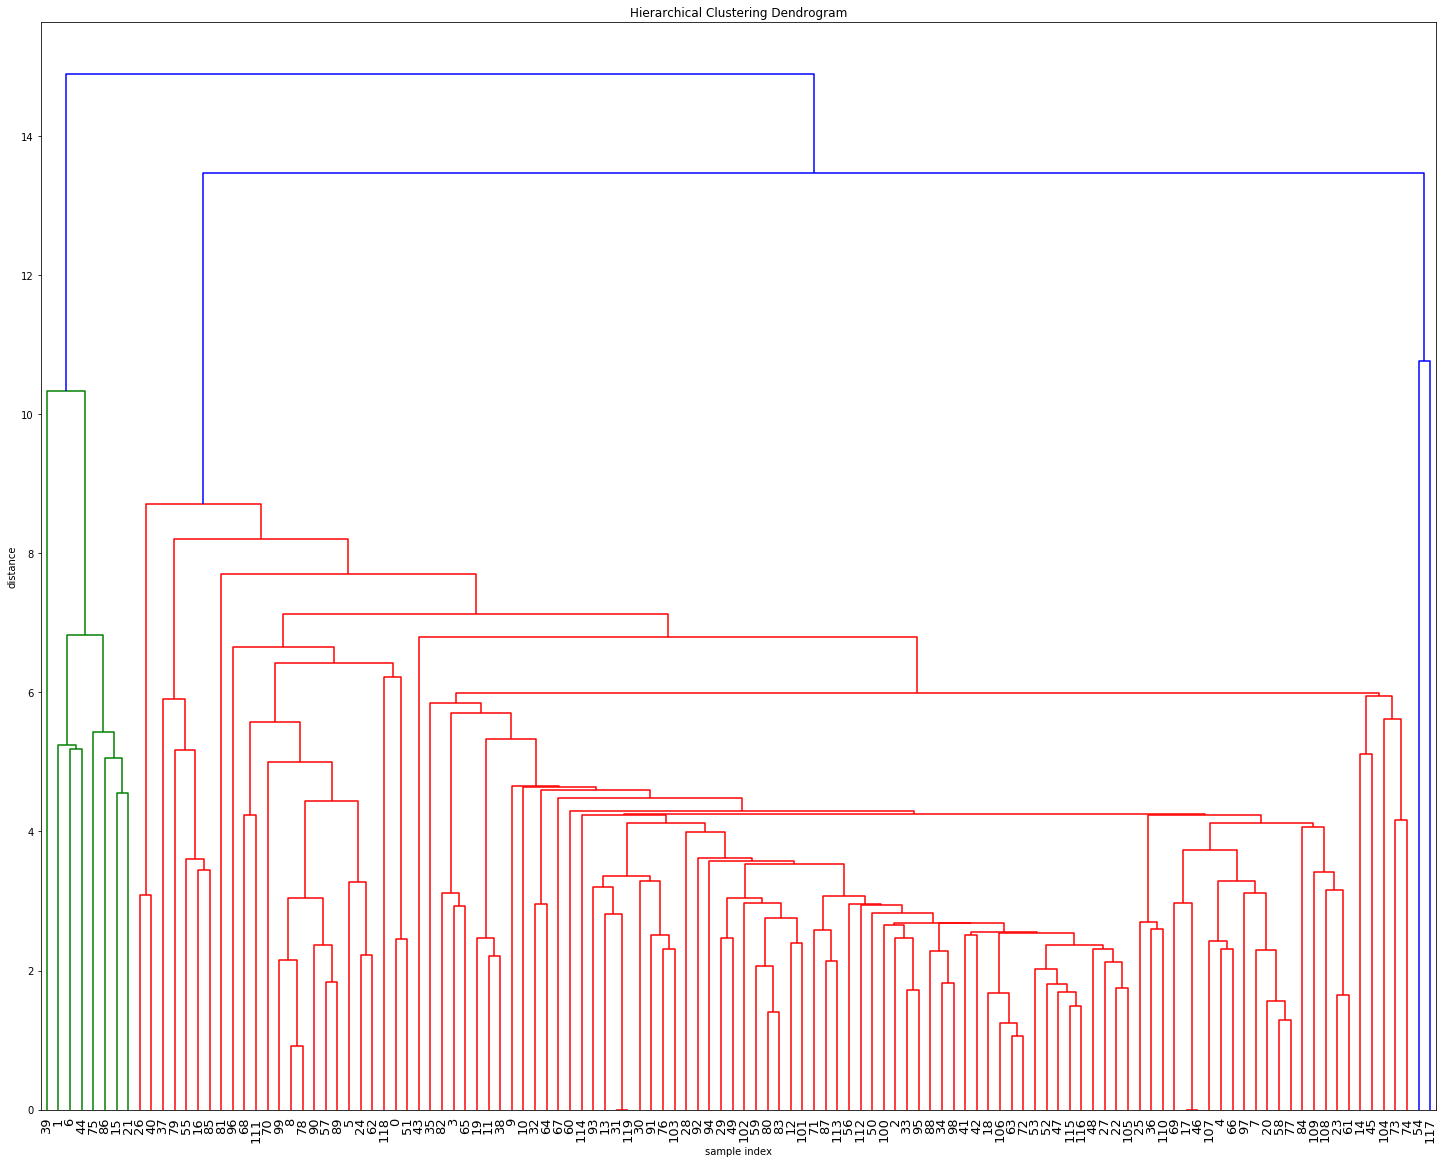

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

## White wine clustering 25%

In [42]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(white_X, white_y, test_size=0.4, random_state=1)

In [43]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

50.00 % in cluster 5
50.00 % in cluster 22


Info for rating=4 

20.00 % in cluster 3
20.00 % in cluster 22
10.00 % in cluster 4
10.00 % in cluster 23
10.00 % in cluster 14
10.00 % in cluster 9
10.00 % in cluster 28
10.00 % in cluster 17


Info for rating=5 

8.49 % in cluster 2
6.60 % in cluster 3
6.60 % in cluster 24
6.60 % in cluster 8
6.60 % in cluster 4
5.66 % in cluster 5
5.66 % in cluster 0
5.66 % in cluster 25
4.72 % in cluster 27
4.72 % in cluster 9
3.77 % in cluster 21
3.77 % in cluster 22
3.77 % in cluster 1
2.83 % in cluster 15
2.83 % in cluster 6
2.83 % in cluster 11
2.83 % in cluster 23
2.83 % in cluster 20
1.89 % in cluster 10
1.89 % in cluster 7
1.89 % in cluster 29
1.89 % in cluster 28
1.89 % in cluster 13
1.89 % in cluster 16
0.94 % in cluster 18
0.94 % in cluster 19


Info for rating=6 

7.54 % in cluster 10
6.53 % in cluster 29
6.53 % in cluster 24
6.03 % in cluster 5
5.53 % in cluster 4
5.53 % in cluster 6
4.52 % in cluster 11
4.52 % in cluster 

In [44]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

49.50 % of rating 6
26.37 % of rating 5
18.16 % of rating 7
2.99 % of rating 8
2.49 % of rating 4
0.50 % of rating 3




In [45]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

49.50 % of rating 6
26.37 % of rating 5
18.16 % of rating 7
2.99 % of rating 8
2.49 % of rating 4
0.50 % of rating 3




In [46]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

50.00 % in cluster 3
50.00 % in cluster 17


Info for rating=4 

20.00 % in cluster 0
20.00 % in cluster 25
20.00 % in cluster 17
10.00 % in cluster 7
10.00 % in cluster 29
10.00 % in cluster 8
10.00 % in cluster 15


Info for rating=5 

8.49 % in cluster 23
7.55 % in cluster 3
6.60 % in cluster 0
6.60 % in cluster 11
5.66 % in cluster 2
5.66 % in cluster 1
5.66 % in cluster 8
4.72 % in cluster 12
4.72 % in cluster 18
4.72 % in cluster 7
3.77 % in cluster 26
3.77 % in cluster 5
3.77 % in cluster 19
3.77 % in cluster 17
2.83 % in cluster 10
2.83 % in cluster 6
2.83 % in cluster 25
1.89 % in cluster 14
1.89 % in cluster 27
1.89 % in cluster 4
1.89 % in cluster 21
1.89 % in cluster 28
1.89 % in cluster 9
1.89 % in cluster 22
0.94 % in cluster 16
0.94 % in cluster 13
0.94 % in cluster 24


Info for rating=6 

9.55 % in cluster 1
9.55 % in cluster 6
7.04 % in cluster 3
6.03 % in cluster 4
5.53 % in cluster 2
4.02 % in cluster 0
4.02 % in cluster 7
3.52 % in cluster 16
3.

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


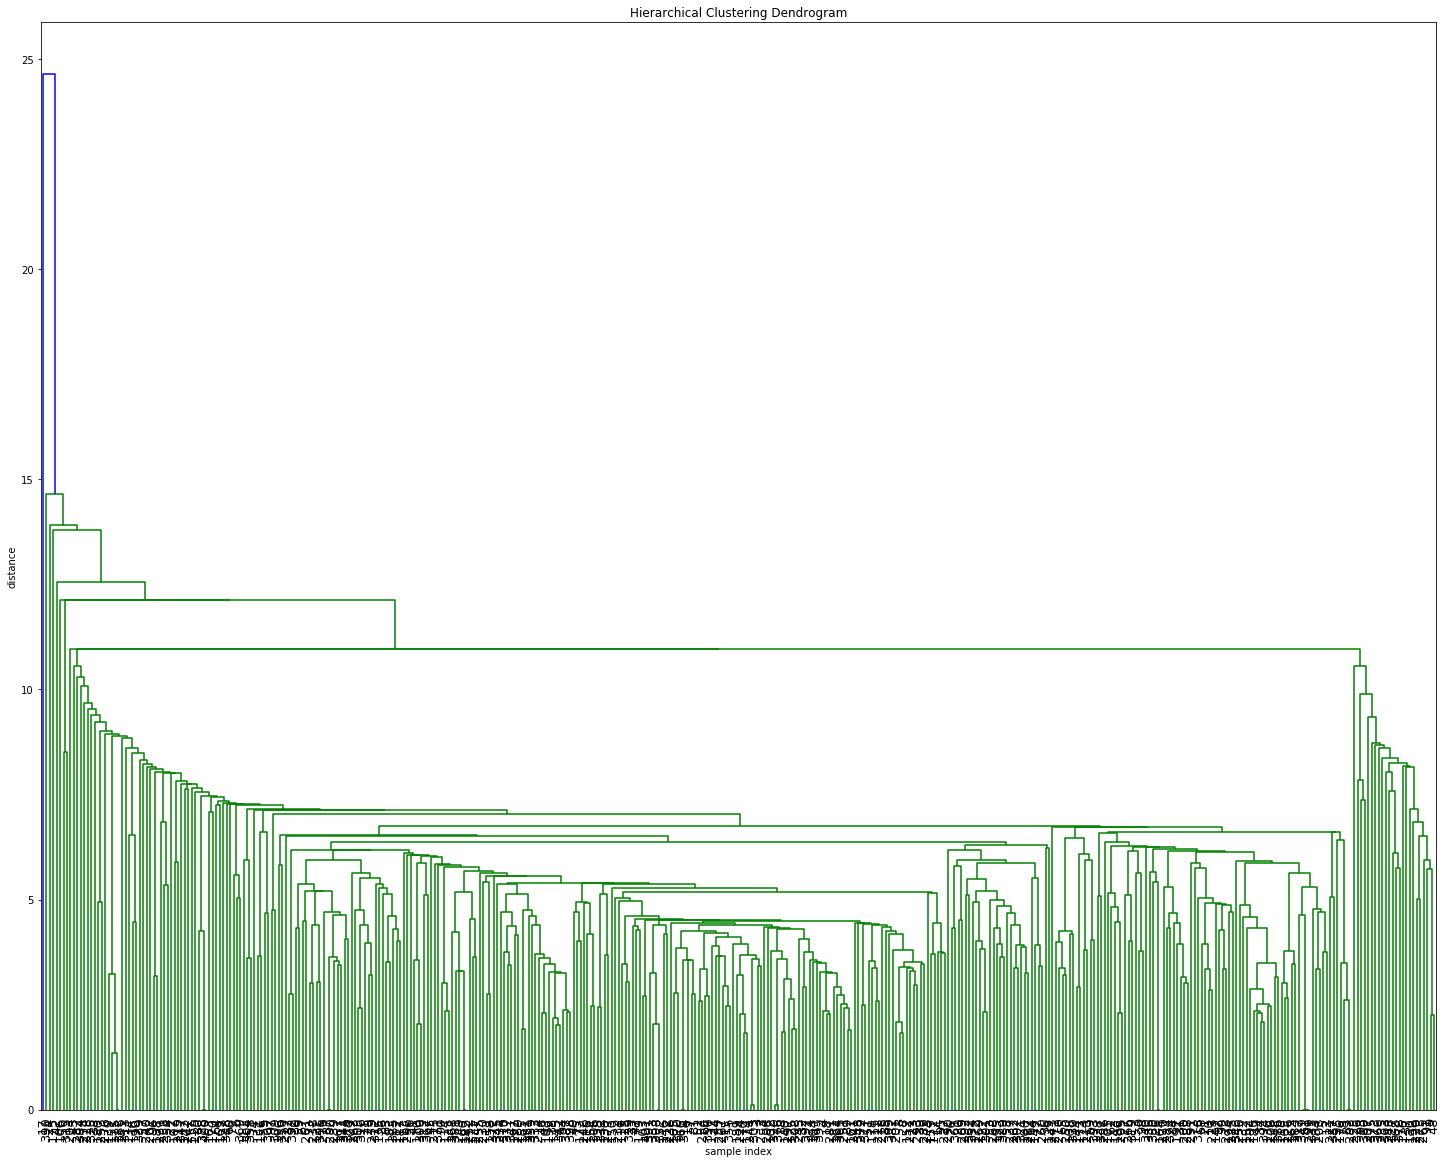

In [48]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

# 50%

In [53]:
red = pd.read_csv('./sample_data/50/red_clean.csv', delimiter='\t',index_col=0)

In [54]:
white = pd.read_csv('./sample_data/50/white_clean.csv', delimiter='\t',index_col=0)

In [55]:
red_X = red.drop(labels='quality', axis=1)
red_y = red['quality']

In [56]:
white_X = white.drop(labels='quality', axis=1)
white_y = white['quality']

## Red wine clustering 50%

In [57]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_X, red_y, test_size=0.4, random_state=1)

In [58]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

100.00 % in cluster 10


Info for rating=4 

44.44 % in cluster 29
11.11 % in cluster 25
11.11 % in cluster 4
11.11 % in cluster 15
11.11 % in cluster 16
11.11 % in cluster 8


Info for rating=5 

7.45 % in cluster 19
6.38 % in cluster 4
6.38 % in cluster 16
5.32 % in cluster 17
5.32 % in cluster 6
5.32 % in cluster 25
5.32 % in cluster 15
4.26 % in cluster 0
4.26 % in cluster 14
4.26 % in cluster 29
3.19 % in cluster 2
3.19 % in cluster 10
3.19 % in cluster 26
3.19 % in cluster 24
3.19 % in cluster 18
3.19 % in cluster 27
3.19 % in cluster 5
3.19 % in cluster 21
3.19 % in cluster 7
3.19 % in cluster 8
3.19 % in cluster 1
2.13 % in cluster 11
2.13 % in cluster 20
2.13 % in cluster 28
1.06 % in cluster 12
1.06 % in cluster 9
1.06 % in cluster 22
1.06 % in cluster 3


Info for rating=6 

15.31 % in cluster 4
12.24 % in cluster 16
10.20 % in cluster 6
10.20 % in cluster 29
6.12 % in cluster 13
6.12 % in cluster 14
4.08 % in cluster 28
4.08 % in cluster 2
4.08 % in clus

In [59]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

45.05 % of rating 6
31.32 % of rating 5
17.03 % of rating 7
4.40 % of rating 4
1.65 % of rating 8
0.55 % of rating 3


Info for cluster #1 

64.91 % of rating 5
28.07 % of rating 6
3.51 % of rating 7
1.75 % of rating 4
1.75 % of rating 8




In [60]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

41.00 % of rating 6
39.33 % of rating 5
13.81 % of rating 7
3.77 % of rating 4
1.67 % of rating 8
0.42 % of rating 3




In [61]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

100.00 % in cluster 13


Info for rating=4 

33.33 % in cluster 9
22.22 % in cluster 18
22.22 % in cluster 27
11.11 % in cluster 17
11.11 % in cluster 2


Info for rating=5 

7.45 % in cluster 18
7.45 % in cluster 2
6.38 % in cluster 3
6.38 % in cluster 6
5.32 % in cluster 14
5.32 % in cluster 13
5.32 % in cluster 4
5.32 % in cluster 17
5.32 % in cluster 8
5.32 % in cluster 5
4.26 % in cluster 0
4.26 % in cluster 27
3.19 % in cluster 22
3.19 % in cluster 23
3.19 % in cluster 7
2.13 % in cluster 10
2.13 % in cluster 26
2.13 % in cluster 16
2.13 % in cluster 24
2.13 % in cluster 28
2.13 % in cluster 21
2.13 % in cluster 12
2.13 % in cluster 19
2.13 % in cluster 9
1.06 % in cluster 15
1.06 % in cluster 1
1.06 % in cluster 25


Info for rating=6 

13.27 % in cluster 2
10.20 % in cluster 0
8.16 % in cluster 9
6.12 % in cluster 22
6.12 % in cluster 21
6.12 % in cluster 18
5.10 % in cluster 6
4.08 % in cluster 27
4.08 % in cluster 14
4.08 % in cluster 15
4.08 % in cluster 

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


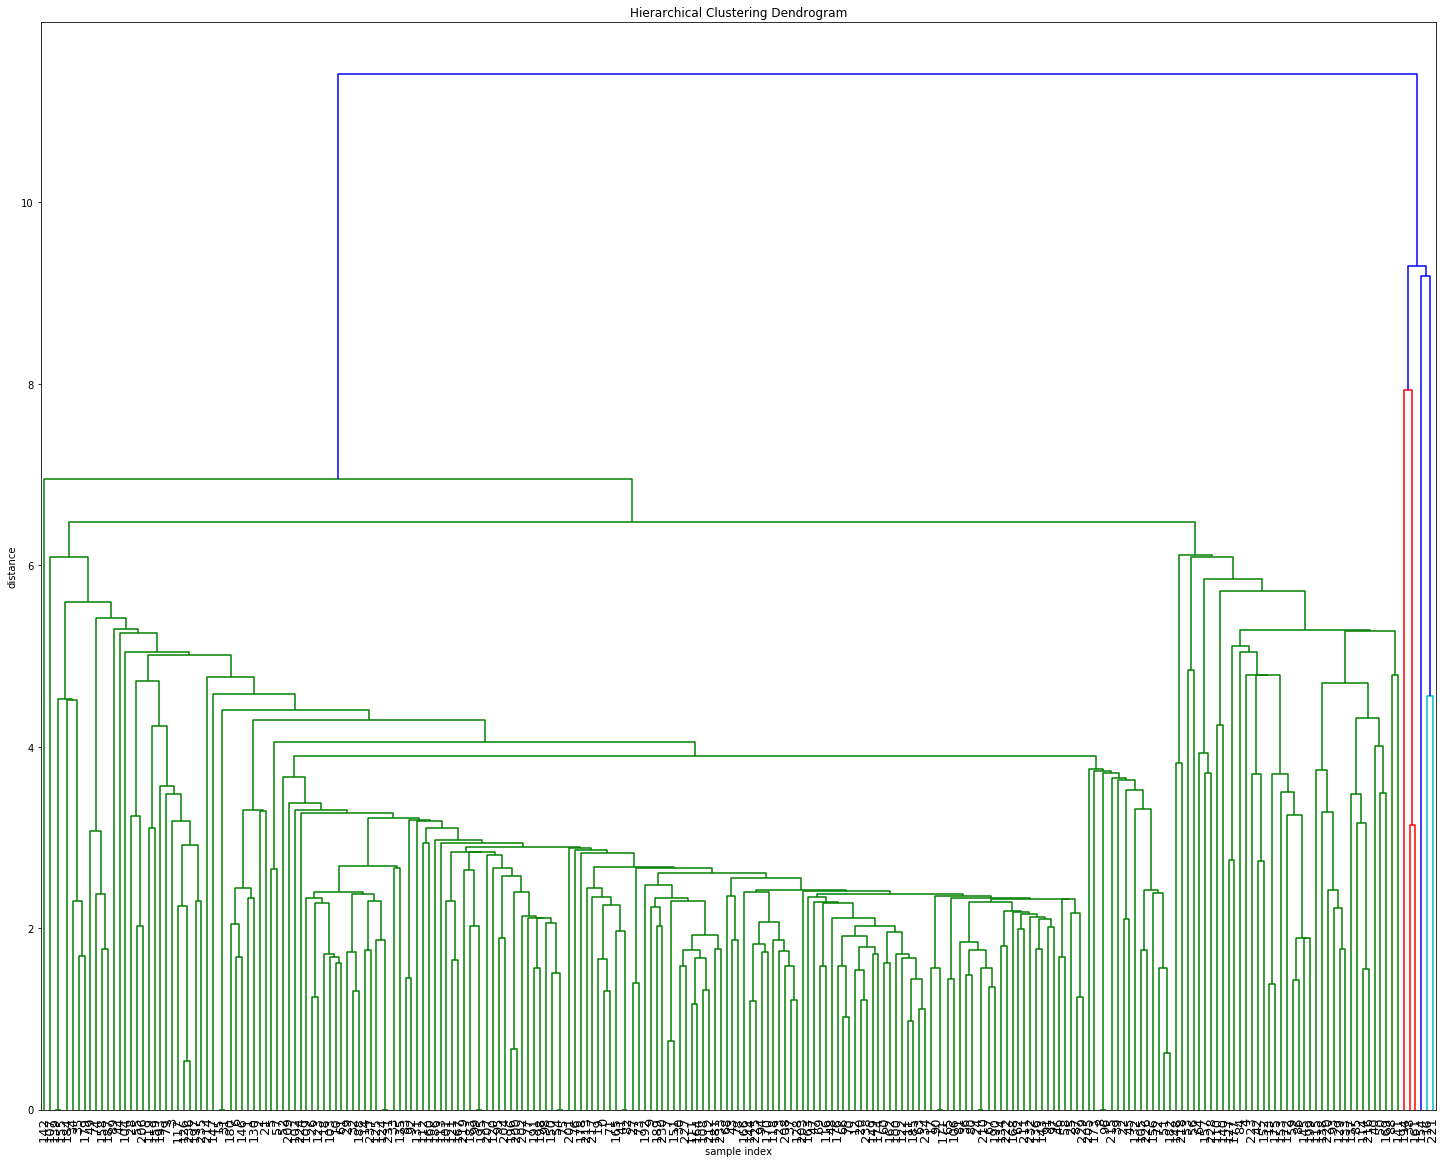

In [63]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

## White wine clustering 50%

In [64]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(white_X, white_y, test_size=0.4, random_state=1)

In [65]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

100.00 % in cluster 8


Info for rating=4 

20.00 % in cluster 28
12.00 % in cluster 1
12.00 % in cluster 18
8.00 % in cluster 6
8.00 % in cluster 15
8.00 % in cluster 25
8.00 % in cluster 8
8.00 % in cluster 19
4.00 % in cluster 5
4.00 % in cluster 14
4.00 % in cluster 27
4.00 % in cluster 22


Info for rating=5 

8.15 % in cluster 28
7.73 % in cluster 3
6.44 % in cluster 27
6.01 % in cluster 11
6.01 % in cluster 0
6.01 % in cluster 12
6.01 % in cluster 6
5.58 % in cluster 18
4.72 % in cluster 22
4.29 % in cluster 1
4.29 % in cluster 26
3.86 % in cluster 2
3.00 % in cluster 5
3.00 % in cluster 21
3.00 % in cluster 9
2.58 % in cluster 13
2.58 % in cluster 25
2.58 % in cluster 8
2.15 % in cluster 14
2.15 % in cluster 16
1.72 % in cluster 7
1.72 % in cluster 29
1.72 % in cluster 24
0.86 % in cluster 23
0.86 % in cluster 20
0.86 % in cluster 10
0.86 % in cluster 4
0.43 % in cluster 19
0.43 % in cluster 17
0.43 % in cluster 15


Info for rating=6 

7.89 % in cluster 8
5

In [66]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

44.21 % of rating 6
29.02 % of rating 5
20.80 % of rating 7
3.11 % of rating 4
2.74 % of rating 8
0.12 % of rating 3




In [67]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

44.21 % of rating 6
29.02 % of rating 5
20.80 % of rating 7
3.11 % of rating 4
2.74 % of rating 8
0.12 % of rating 3




In [68]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

100.00 % in cluster 28


Info for rating=4 

16.00 % in cluster 17
16.00 % in cluster 13
12.00 % in cluster 27
8.00 % in cluster 10
8.00 % in cluster 5
8.00 % in cluster 18
8.00 % in cluster 20
4.00 % in cluster 8
4.00 % in cluster 21
4.00 % in cluster 16
4.00 % in cluster 14
4.00 % in cluster 29
4.00 % in cluster 19


Info for rating=5 

9.87 % in cluster 4
8.58 % in cluster 2
8.15 % in cluster 0
6.44 % in cluster 5
6.01 % in cluster 14
6.01 % in cluster 7
5.15 % in cluster 13
4.72 % in cluster 17
4.29 % in cluster 6
3.86 % in cluster 18
3.43 % in cluster 19
3.00 % in cluster 9
3.00 % in cluster 28
3.00 % in cluster 8
2.58 % in cluster 12
2.58 % in cluster 15
2.15 % in cluster 1
2.15 % in cluster 22
1.72 % in cluster 26
1.72 % in cluster 16
1.72 % in cluster 24
1.72 % in cluster 25
1.72 % in cluster 27
1.29 % in cluster 23
1.29 % in cluster 3
1.29 % in cluster 10
0.86 % in cluster 11
0.86 % in cluster 21
0.43 % in cluster 20
0.43 % in cluster 29


Info for rating=6

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


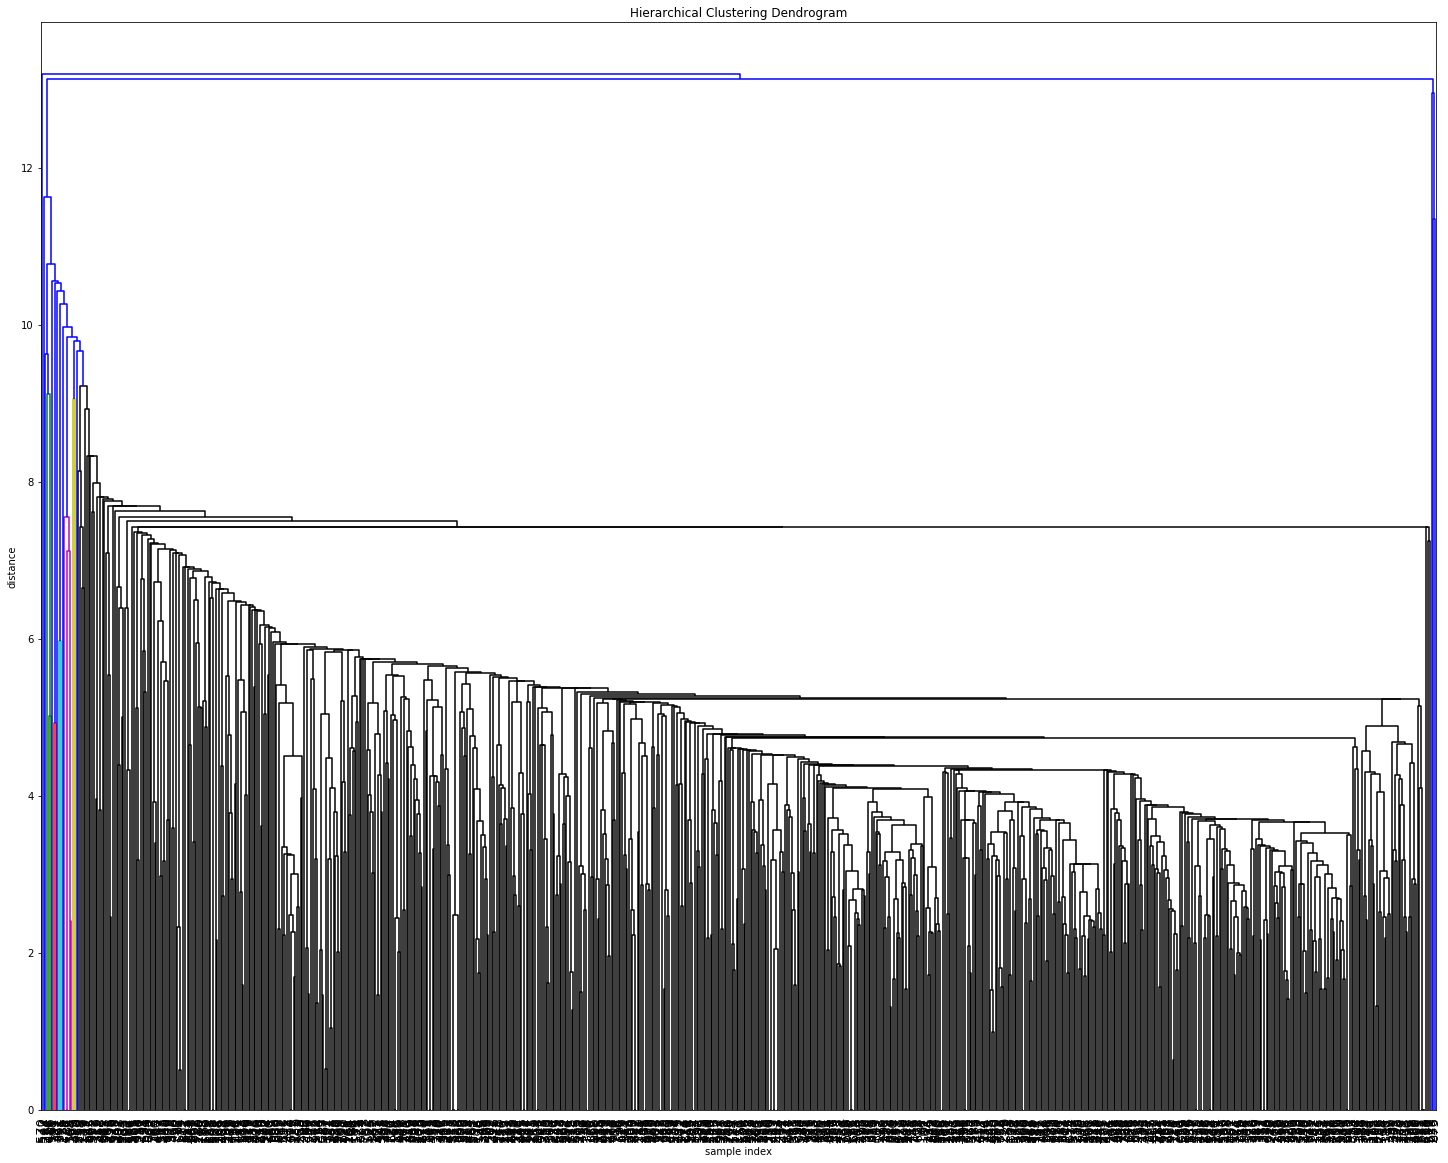

In [70]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

# 75%

In [71]:
red = pd.read_csv('./sample_data/75/red_clean.csv', delimiter='\t',index_col=0)

In [72]:
white = pd.read_csv('./sample_data/75/white_clean.csv', delimiter='\t',index_col=0)

In [73]:
red_X = red.drop(labels='quality', axis=1)
red_y = red['quality']

In [74]:
white_X = white.drop(labels='quality', axis=1)
white_y = white['quality']

## Red wine clustering 75%

In [78]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_X, red_y, test_size=0.4, random_state=1)

In [79]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

50.00 % in cluster 11
50.00 % in cluster 5


Info for rating=4 

33.33 % in cluster 5
22.22 % in cluster 15
22.22 % in cluster 2
11.11 % in cluster 0
11.11 % in cluster 21


Info for rating=5 

10.00 % in cluster 2
9.38 % in cluster 14
6.88 % in cluster 5
6.88 % in cluster 1
5.62 % in cluster 24
5.00 % in cluster 0
4.38 % in cluster 21
4.38 % in cluster 20
4.38 % in cluster 29
4.38 % in cluster 15
3.75 % in cluster 16
3.75 % in cluster 3
3.75 % in cluster 25
3.12 % in cluster 9
3.12 % in cluster 7
2.50 % in cluster 8
2.50 % in cluster 18
1.88 % in cluster 22
1.88 % in cluster 12
1.88 % in cluster 17
1.88 % in cluster 13
1.88 % in cluster 23
1.25 % in cluster 11
1.25 % in cluster 10
1.25 % in cluster 27
1.25 % in cluster 26
1.25 % in cluster 28
0.62 % in cluster 4


Info for rating=6 

12.03 % in cluster 5
11.28 % in cluster 14
9.77 % in cluster 2
7.52 % in cluster 0
6.77 % in cluster 23
6.77 % in cluster 9
5.26 % in cluster 21
5.26 % in cluster 20
3.76 % in cluster 

In [80]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

44.57 % of rating 5
37.05 % of rating 6
13.93 % of rating 7
2.51 % of rating 4
1.39 % of rating 8
0.56 % of rating 3




In [81]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

44.57 % of rating 5
37.05 % of rating 6
13.93 % of rating 7
2.51 % of rating 4
1.39 % of rating 8
0.56 % of rating 3




In [82]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

50.00 % in cluster 27
50.00 % in cluster 13


Info for rating=4 

22.22 % in cluster 13
22.22 % in cluster 8
11.11 % in cluster 17
11.11 % in cluster 26
11.11 % in cluster 28
11.11 % in cluster 9
11.11 % in cluster 1


Info for rating=5 

11.88 % in cluster 3
6.88 % in cluster 13
6.88 % in cluster 11
5.62 % in cluster 2
5.00 % in cluster 1
4.38 % in cluster 16
4.38 % in cluster 5
4.38 % in cluster 4
4.38 % in cluster 0
4.38 % in cluster 6
3.75 % in cluster 14
3.75 % in cluster 8
3.75 % in cluster 26
3.75 % in cluster 15
3.75 % in cluster 10
3.12 % in cluster 23
2.50 % in cluster 22
2.50 % in cluster 28
2.50 % in cluster 17
2.50 % in cluster 9
2.50 % in cluster 24
2.50 % in cluster 18
1.88 % in cluster 21
1.25 % in cluster 12
1.25 % in cluster 29
0.62 % in cluster 7


Info for rating=6 

12.03 % in cluster 3
9.77 % in cluster 1
9.02 % in cluster 6
6.77 % in cluster 14
6.77 % in cluster 17
6.02 % in cluster 27
6.02 % in cluster 13
4.51 % in cluster 9
3.76 % in cluster

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


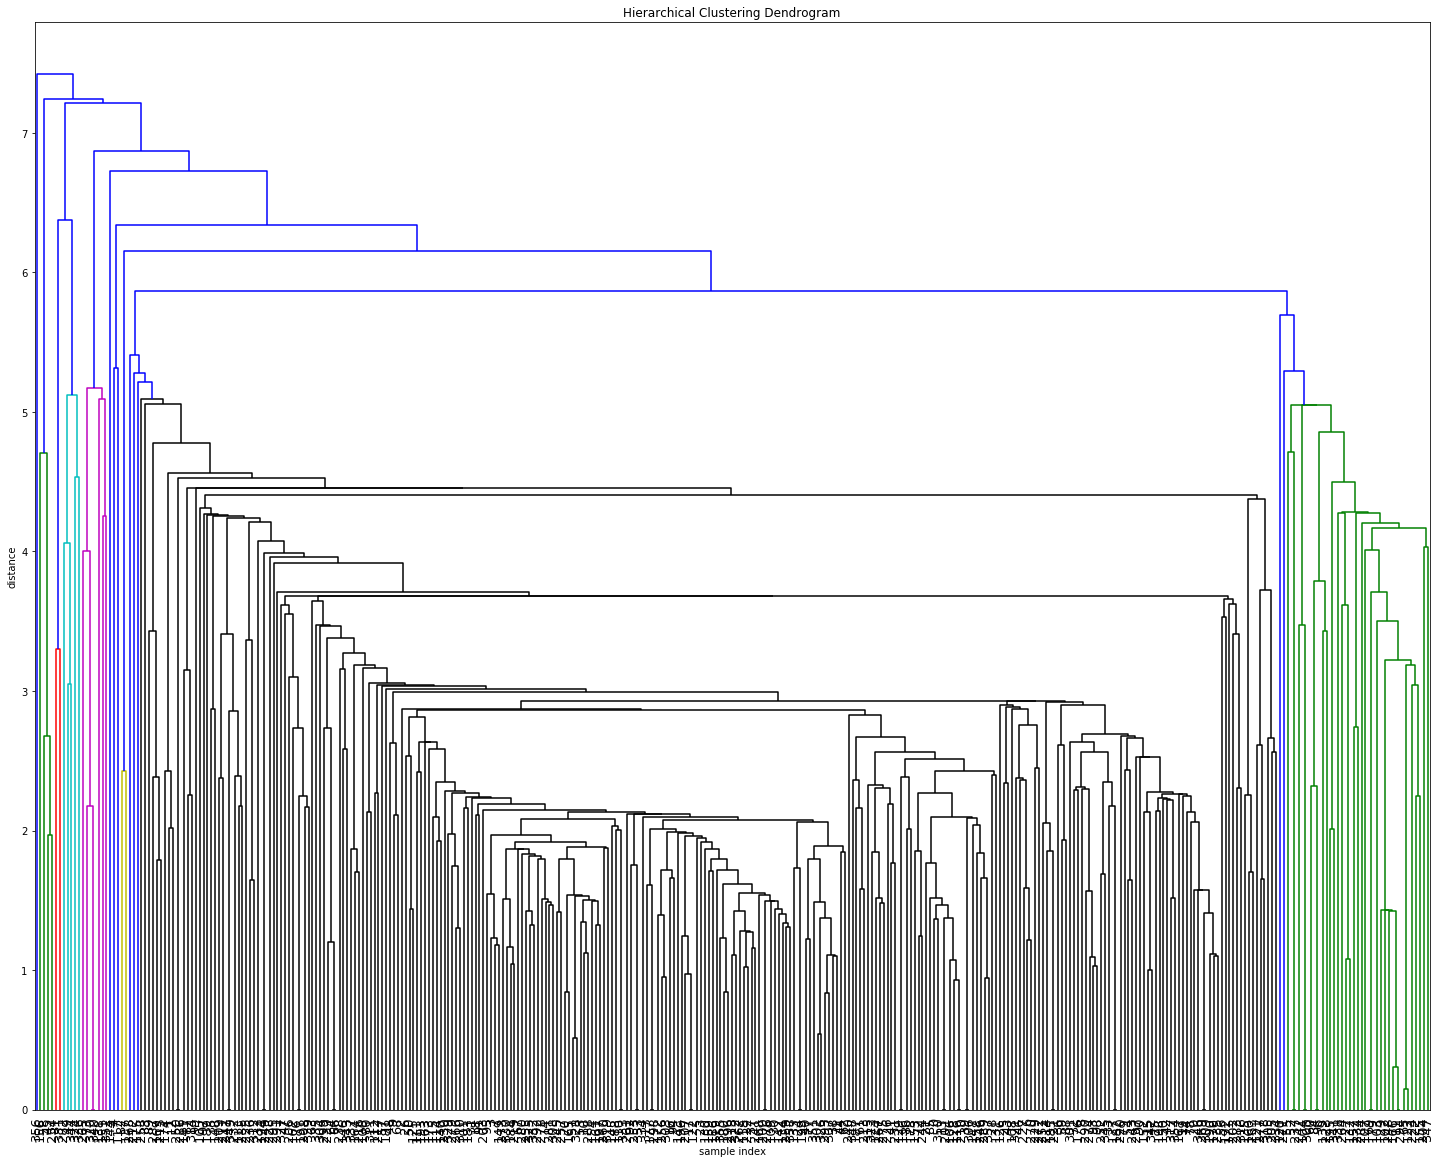

In [84]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()

## White wine clustering 75%

In [85]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(white_X, white_y, test_size=0.4, random_state=1)

In [86]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

50.00 % in cluster 5
50.00 % in cluster 4


Info for rating=4 

20.00 % in cluster 15
12.00 % in cluster 24
8.00 % in cluster 28
8.00 % in cluster 27
8.00 % in cluster 0
8.00 % in cluster 6
8.00 % in cluster 4
8.00 % in cluster 10
8.00 % in cluster 17
4.00 % in cluster 9
4.00 % in cluster 7
4.00 % in cluster 14


Info for rating=5 

7.06 % in cluster 11
5.88 % in cluster 24
5.88 % in cluster 7
5.59 % in cluster 2
5.59 % in cluster 1
5.29 % in cluster 5
4.71 % in cluster 10
4.71 % in cluster 28
4.71 % in cluster 14
4.71 % in cluster 17
3.82 % in cluster 4
3.82 % in cluster 19
3.53 % in cluster 15
3.53 % in cluster 18
3.24 % in cluster 23
2.94 % in cluster 8
2.94 % in cluster 3
2.65 % in cluster 0
2.35 % in cluster 21
2.35 % in cluster 26
2.06 % in cluster 9
2.06 % in cluster 20
2.06 % in cluster 13
1.76 % in cluster 29
1.47 % in cluster 25
1.47 % in cluster 12
1.18 % in cluster 22
1.18 % in cluster 27
1.18 % in cluster 6
0.29 % in cluster 16


Info for rating=6 

7.3

In [87]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

45.27 % of rating 6
28.24 % of rating 5
20.51 % of rating 7
3.65 % of rating 8
2.08 % of rating 4
0.17 % of rating 3
0.08 % of rating 9




In [88]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

100.00 % of rating 7


Info for cluster #1 

45.45 % of rating 6
28.36 % of rating 5
20.18 % of rating 7
3.67 % of rating 8
2.09 % of rating 4
0.17 % of rating 3
0.08 % of rating 9




In [89]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

50.00 % in cluster 28
50.00 % in cluster 3


Info for rating=4 

20.00 % in cluster 3
16.00 % in cluster 10
16.00 % in cluster 1
12.00 % in cluster 25
8.00 % in cluster 17
8.00 % in cluster 24
4.00 % in cluster 13
4.00 % in cluster 0
4.00 % in cluster 22
4.00 % in cluster 15
4.00 % in cluster 2


Info for rating=5 

10.29 % in cluster 3
7.35 % in cluster 9
6.76 % in cluster 21
6.18 % in cluster 11
5.59 % in cluster 4
5.29 % in cluster 12
5.29 % in cluster 0
4.41 % in cluster 1
4.12 % in cluster 24
3.82 % in cluster 10
3.82 % in cluster 14
3.53 % in cluster 5
3.53 % in cluster 15
3.24 % in cluster 2
2.94 % in cluster 8
2.35 % in cluster 20
2.35 % in cluster 13
2.35 % in cluster 29
2.35 % in cluster 28
2.06 % in cluster 26
1.76 % in cluster 6
1.76 % in cluster 23
1.47 % in cluster 16
1.18 % in cluster 25
1.18 % in cluster 17
1.18 % in cluster 18
1.18 % in cluster 19
1.18 % in cluster 22
0.88 % in cluster 7
0.59 % in cluster 27


Info for rating=6 

8.26 % in cluster 0

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


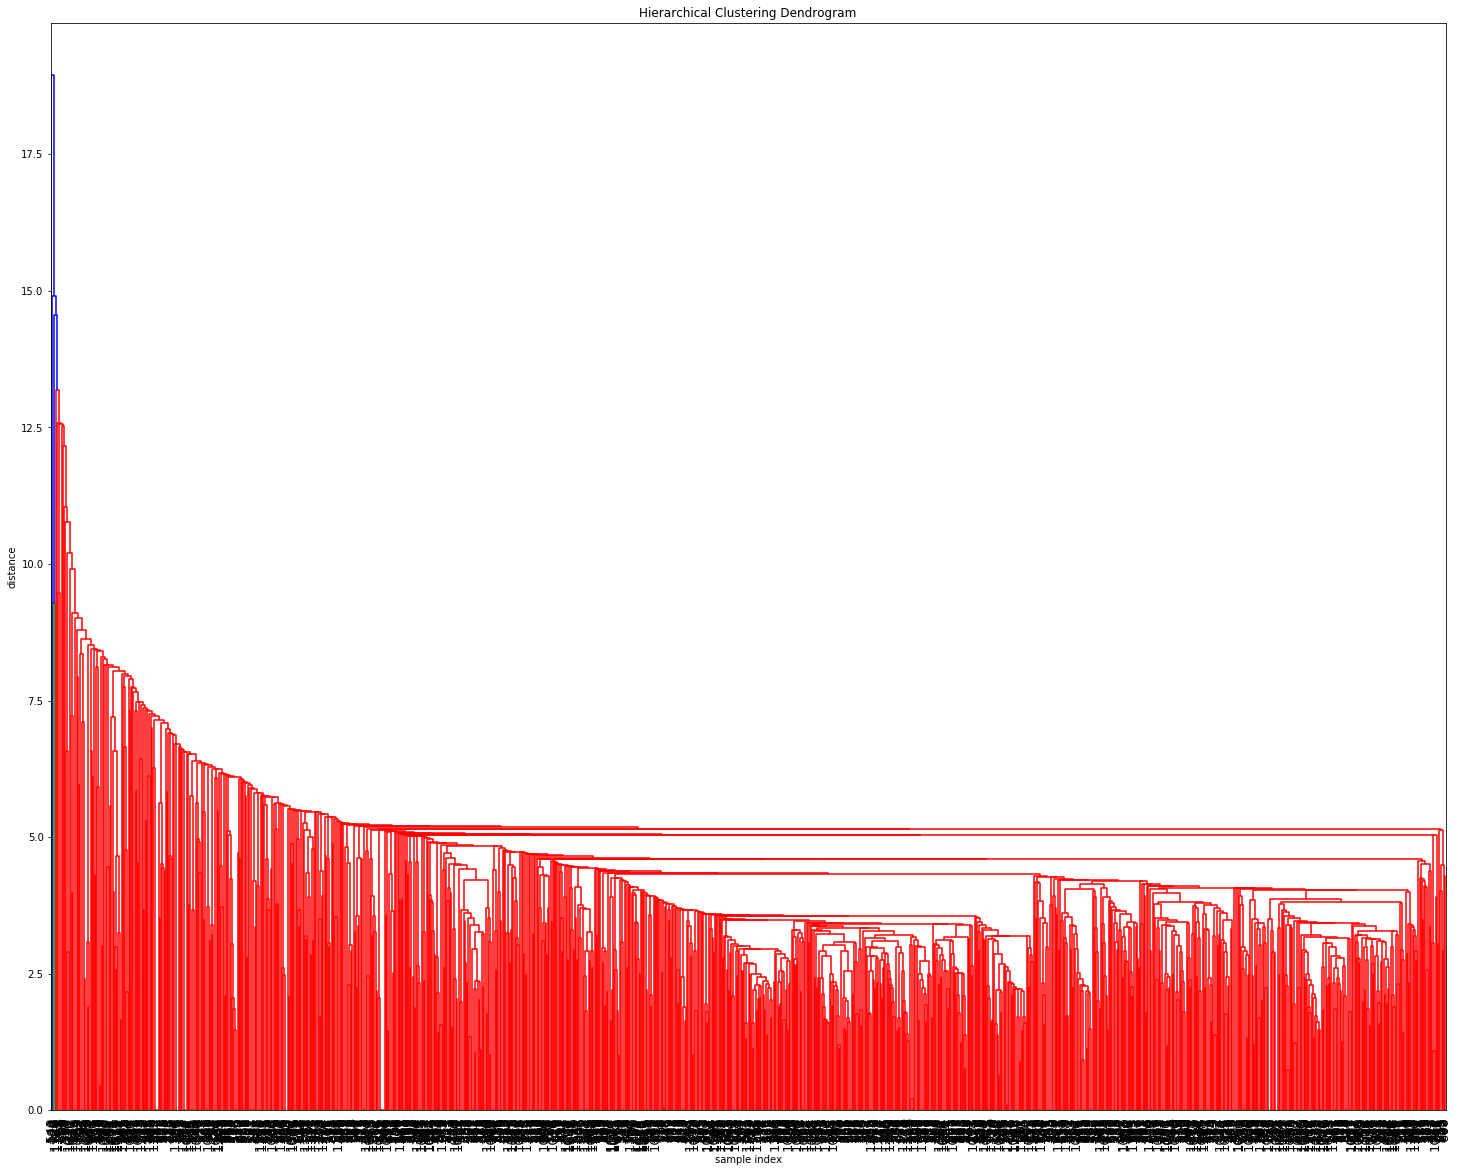

In [91]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()